O problema proposto envolve a utilização do conjunto de dados Boston Housing para resolver uma tarefa: utilizar regressão para estimar o preço dos imóveis.
- A variável alvo é a MEDV (preço médio dos imóveis)
- Defina avalie diferentes valores para K;
- Como regressor, utilize o algoritmo do KNN.
- A definição do valor de K deve ser baseada na escolha do modelo que apresenta os melhores resultados baseados nas métricas de MAE, MSE, RMSE e MAPE.
- Forneça uma visualização dos dados (matriz de correlação e pairplot) e uma discussão quanto aos resultados.

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic


| Variable | Description                                                                 |
|----------|-----------------------------------------------------------------------------|
| CRIM     | per capita crime rate by town                                              |
| ZN       | proportion of residential land zoned for lots over 25,000 sq.ft.           |
| INDUS    | proportion of non-retail business acres per town                           |
| CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)      |
| NOX      | nitric oxides concentration (parts per 10 million)                         |
| RM       | average number of rooms per dwelling                                       |
| AGE      | proportion of owner-occupied units built prior to 1940                     |
| DIS      | weighted distances to five Boston employment centres                       |
| RAD      | index of accessibility to radial highways                                  |
| TAX      | full-value property-tax rate per $10,000                                   |
| PTRATIO  | pupil-teacher ratio by town                                                |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town             |
| LSTAT    | % lower status of the population                                           |
| MEDV     | Median value of owner-occupied homes in $1000's                            |


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

data_df = pd.DataFrame(data)
data_df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTATUS", "MEDV"]

data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATUS,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
target = data_df["MEDV"]


In [27]:
nan_values = data_df.isna().sum()
nan_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTATUS    0
MEDV       0
dtype: int64

In [28]:
null_values = data_df.isnull().sum()
null_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTATUS    0
MEDV       0
dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler


features = data_df.drop(columns=["MEDV"])

scaler = MinMaxScaler()

norm_columns = scaler.fit_transform(features)

norm_df = pd.DataFrame(norm_columns, columns=features.columns)
norm_df["MEDV"] = data_df["MEDV"]
norm_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATUS,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [31]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTATUS  506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


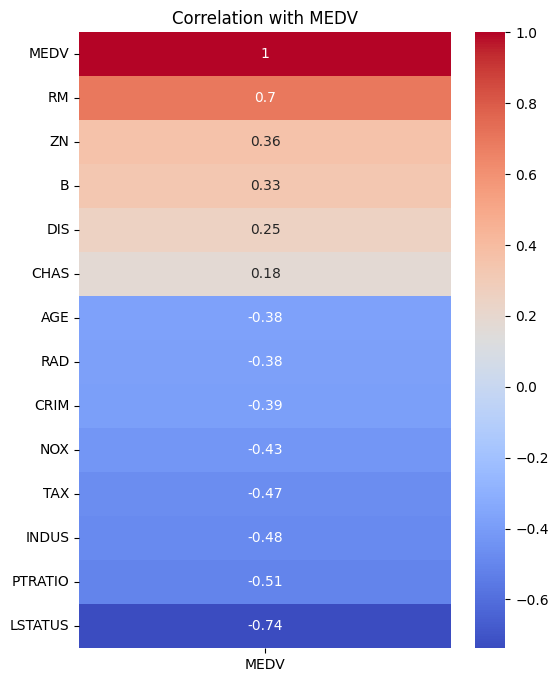

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = norm_df.corr()

plt.figure(figsize=(6, 8))
sns.heatmap(correlation_matrix[["MEDV"]].sort_values(by="MEDV", ascending=False), annot=True, cbar=True, cmap="coolwarm")

plt.title("Correlation with MEDV")
plt.show()